# Scraper for Twitter 

Package: https://github.com/Mottl/GetOldTweets3

In [0]:
!pip install GetOldTweets3 

In [0]:
import GetOldTweets3 as got
import pandas as pd
import numpy as np
from datetime import datetime
import re

In [0]:
import nltk
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Scraping
**Output**: dataframe and csv of tweets for given criterias
___

Collecting all of the tweets for the given topic, for given period of time, and maximum number of tweets.




In [0]:
topic = 'virus'

In [0]:
text_query = 'коронавірус'
since_date = '2020-01-01'
until_date = str(datetime.date(datetime.now()))
count = 5000

tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query).setSince(since_date).setUntil(until_date).setMaxTweets(count)# Creation of list that contains all tweets
tweets = got.manager.TweetManager.getTweets(tweetCriteria)

In [0]:
len(tweets)

5000

Some tweets are quite short (just a picture without text, one or two words, or just one hashtag). To get more relevant information, we are going to use only long tweets (more than 40 symbols).

In [0]:
tweets_long = [tweet.text for tweet in tweets if len(tweet.text)>40]
len(tweets_long)

4761

Some are retweets or quotes, so are the same.

In [0]:
tweets_long = list(set(tweets_long))
len(tweets_long)

4537

So from 5000 tweets we parsed, 4761 may be relevant and only 4537 are unique.

In [0]:
#to save each tweet to separete .txt file (encoding utf8) (needed for making a taxonomy using ConCat Studio)
def to_sep_files(tweets):
  i = 1
  for tweet in tweets:
      text_file = open('files2/' + str(i) + '.txt', "w", encoding='utf8')
      n = text_file.write(tweet)
      text_file.close()
      i += 1

In [0]:
to_sep_files(tweets_long)
!zip -r /content/file.zip /content/Folder_To_Zip

In [0]:
#text of the tweets to one txt
def to_file(tweets, name):
  with open(f"output/{name}.txt", "w") as file:
      for tweet in tweets:
          file.write(re.sub(r"\s$","",tweet) + '\n')

In [0]:
to_file(tweets_long, 'initial_text')

In [0]:
#text of tweets to the dataframe
df = pd.DataFrame(tweets_long, columns = ['Text'])
df.to_csv(topic+'_initial.csv', sep=',')

## Cleaning the data
**Output**: same but without punctuation, mentions or links
___
Crean the text from any kind of irrelevant symbols, including numbers, punctuation, links, mentions, russian letters, etc.

In [0]:
#cleaned_text = tweets_long.copy()

###OR if you just want to load already scraped tweets
cleaned_text = [text[0] for text in pd.read_csv(f'{topic}_initial.csv', index_col=0).to_numpy()]

In [0]:
for i in range(len(cleaned_text)):
    cleaned_text[i] = re.sub(r'((http\S+)|(@\w+)|(\s$)|[a-zA-Z0-9]|\]|\[|[«»!#@$%^&*()=_+-|;\':",.<>?…])', '', cleaned_text[i], flags=re.MULTILINE).lower()
    cleaned_text[i] = re.sub(r'  ', ' ', cleaned_text[i])
    #delete words that use russian symbols
    cleaned_text[i] = re.sub(r'( \w*(э|ы)\w*)', ' ', cleaned_text[i]).split()
    #delete additional bad symbols that can't be put in the RegEx
    cleaned_text[i] = [w.replace('—', '') for w in cleaned_text[i]]
    cleaned_text[i] = [w.replace('–', '') for w in cleaned_text[i]]


## Getting rid of stop words
**Output**: same but without stop words
___

Clean the text from all words that have no meaning for our purposes. Taking into account specifics of spoken Ukrainian language (the one that is commonly used for the tweets) Russian stop words are also added.


In [0]:
stop_words_ru = ['вам', 'да', 'том', 'раз', 'всего', 'чтоб', 'можно', 'что','где', 'а', 'этого', 'кем', 'она', 'нему', 'тем', 'им', 'лет', 'мною', 'меня', 'сие', 'того', 'на', 'уж', 'какой', 'за', 'никогда', 'чуть', 'конечно', 'вся', 'без', 'он', 'все', 'той', 'ест', 'надо', 'как', 'но', 'одни', 'здесь', 'нельзя', 'для', 'этой', 'сейчас', 'бы', 'хоть', 'кому', 'были', 'через', 'коли', 'лучше', 'могу', 'такой', 'одна', 'ими', 'чего', 'при', 'у', 'даже', 'ведь', 'мое', 'иногда', 'тогда', 'будет', 'весь', 'наш', 'было', 'этих', 'его', 'или', 'опять', 'нею', 'нем', 'в', 'тот', 'когда', 'наконец', 'по', 'мой', 'перед', 'моя', 'чтобы', 'чей', 'до', 'одно', 'нее', 'чья', 'о', 'будто', 'два', 'вас', 'после', 'что', 'более', 'тех', 'с', 'моею', 'ему', 'ли', 'впрочем', 'ваш', 'потом', 'какая', 'другой', 'вон', 'всю', 'них', 'моем', 'три', 'ней', 'моей', 'теперь', 'нибудь', 'мол', 'об', 'разве', 'вниз', 'куда', 'лишь', 'я', 'нас', 'тут', 'много', 'ним', 'сей', 'мне', 'сам', 'есть', 'потому', 'больше', 'над', 'себе', 'всех', 'дай', 'мои', 'про', 'к', 'ей', 'вот', 'ето', 'ну', 'эта', 'тоже', 'их', 'они', 'со', 'если', 'вдруг', 'тебя', 'будь', 'оно', 'свою', 'руб', 'один', 'во', 'едим', 'себя', 'ваше', 'чем', 'то', 'может', 'еще', 'уже', 'кто', 'под', 'мы', 'ее', 'только', 'нам', 'мою', 'там', 'хорошо', 'нашу', 'же', 'между', 'всегда', 'совсем', 'ними', 'вы', 'иже', 'из', 'зачем', 'так', 'ж', 'почти', 'него', 'от', 'либо',  'и', 'ничего']
stop_words_uk = ['який', 'яка', 'які', 'на','щоб','цей','той','чи','від','під','це','вам','шо','б', 'мій', 'y', 'той', 'тоді', 'тим', 'вже', 'чим', 'цей','тож', 'отак', 'із', 'бо', 'але','і','та','її','вона','ти','тобі','що', 'як','ще','в','або','а','от','у','з', 'які', 'чим', 'це', 'ці','й']
stop_words = stop_words_ru + stop_words_uk

In [0]:
for j in range(len(cleaned_text)):
    for i in ((cleaned_text[j])):
        if i in stop_words:
            cleaned_text[j].remove(i)

In [0]:
[" ".join(text) for text in cleaned_text[:5]]

['безпека лікарів працівник швидкий захисний костюм кількість зараження лікарів невпинно ріст цифра біля тис люди ми мата забезпечити належний захист працівник швидкий медичний галуза зоб вони могти захищати коронавірус безпекамедиківшвидкоа',
 'знову несподіваний сюжет думати пропустити андрій холодовий півтора місяць провести карантин кіпр кажуть хворіти коронавірус не зовсім настрій стрічка',
 'лабораторія ухань відкидати звинувачення створення новий коронавірус уханський інститут вірусологія керівник уханський інститут вірусологія заперечувати новий коронавірус могти створити йог установа він наголошувати поки немає достовірний',
 'кордон коронавірус одужати пів сотня українець новина новість тсн коронавірус коронавирус',
 'доба кременецький район виявити хворий коронавірус карта поширення']

In [0]:
df = pd.DataFrame([" ".join(text) for text in cleaned_text], columns = ['Text'])
df.to_csv(topic + "_cleaned.csv", sep=',')

## Lemmatisation
output: dataframe and csv of tweets for given criterias lemmatized

As long as official pymorphy2 that can be installed from PyPi is not supporting ukrainian, and the latest version from their gitgub is used.

In [0]:
!pip install git+https://github.com/JuliaZavalnuk/pymorphy2.git 
#https://github.com/kmike/pymorphy2
!pip install pymorphy2-dicts-uk

In [0]:
import pymorphy2

In [0]:
#setting library paths, so the libraries can be used
morph = pymorphy2.MorphAnalyzer(path='/usr/local/lib/python3.6/dist-packages/pymorphy2_dicts_uk/data/')

In [0]:
lemmatized_text = cleaned_text.copy()

In [0]:
for j in range(len(lemmatized_text)):
    for i in range(len(lemmatized_text[j])):
        lemmatized_text[j][i]= morph.parse(lemmatized_text[j][i])[0].normal_form

In [0]:
[" ".join(text) for text in lemmatized_text[:5]]

['безпека лікарів працівник швидкий захисний костюм кількість зараження лікарів невпинно ріст цифра біля тис люди ми мата забезпечити належний захист працівник швидкий медичний галуза зоб вони могти захищати коронавірус безпекамедиківшвидкоа',
 'знову несподіваний сюжет думати пропустити андрій холодовий півтора місяць провести карантин кіпр кажуть хворіти коронавірус не зовсім настрій стрічка',
 'лабораторія ухань відкидати звинувачення створення новий коронавірус уханський інститут вірусологія керівник уханський інститут вірусологія заперечувати новий коронавірус могти створити йог установа він наголошувати поки немає достовірний',
 'кордон коронавірус одужати пів сотня українець новина новість тсн коронавірус коронавирус',
 'доба кременецький район виявити хворий коронавірус карта поширення']

In [0]:
temp = [" ".join(tweet) for tweet in lemmatized_text]
df = pd.DataFrame(temp, columns = ['Text'])
df.to_csv(topic + "_lemmatized.csv", sep=',')

In [0]:
to_sep_files([" ".join(tweet) for tweet in lemmatized_text])
!zip -r /content/file2.zip /content/files2

## Stemming
output: dataframe and csv of tweets for given criterias stemmed

Stemming won't be used for our purpuses, but in general, was fun to try.

In [0]:
from nltk.stem.snowball import RussianStemmer

In [0]:
stemmer = RussianStemmer(False)

stemmed_text = cleaned_text.copy()
for j in range(len(stemmed_text)):
    for i in range(len(stemmed_text[j])):
        stemmed_text[j][i]= stemmer.stem(stemmed_text[j][i])

In [0]:
temp = [[tweet] for tweet in stemmed_text]
df = pd.DataFrame(temp, columns = ['Text'])
df.to_csv(topic + "_stemmed", sep=',')

In [0]:
p

# New Section

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from PIL import Image

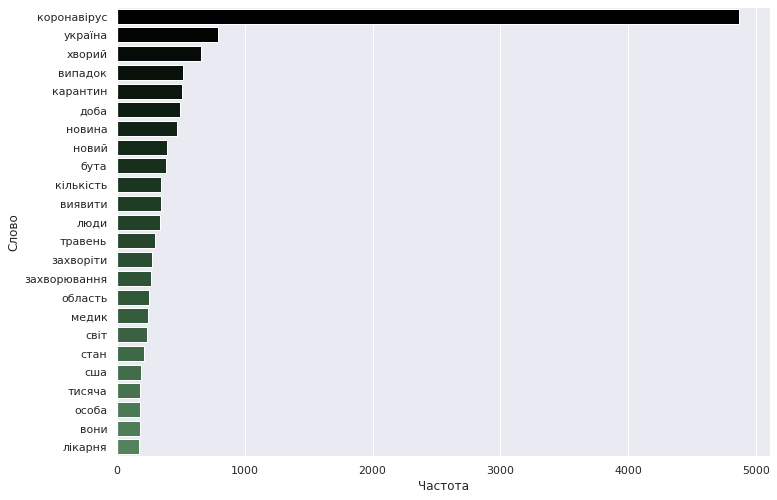

In [265]:
freq = {}
for line in lemmatized_text:
  for word in line:
    if word in freq.keys():
      freq[word] += 1
    else:
      freq[word] = 1

del freq['не']
del freq['']

freq_r = [[k,v] for v,k in freq.items()]

freq_r.sort()
freq_r.reverse()

freq_r_0 = [i[0] for i in freq_r[:24]]
freq_r_1 = [i[1] for i in freq_r[:24]]
df = pd.DataFrame(data = {'Частота': freq_r_0, 'Слово': freq_r_1})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Слово',data=df, palette = sns.cubehelix_palette(50, start=2, rot=0, dark=0, light=.95, reverse=True))

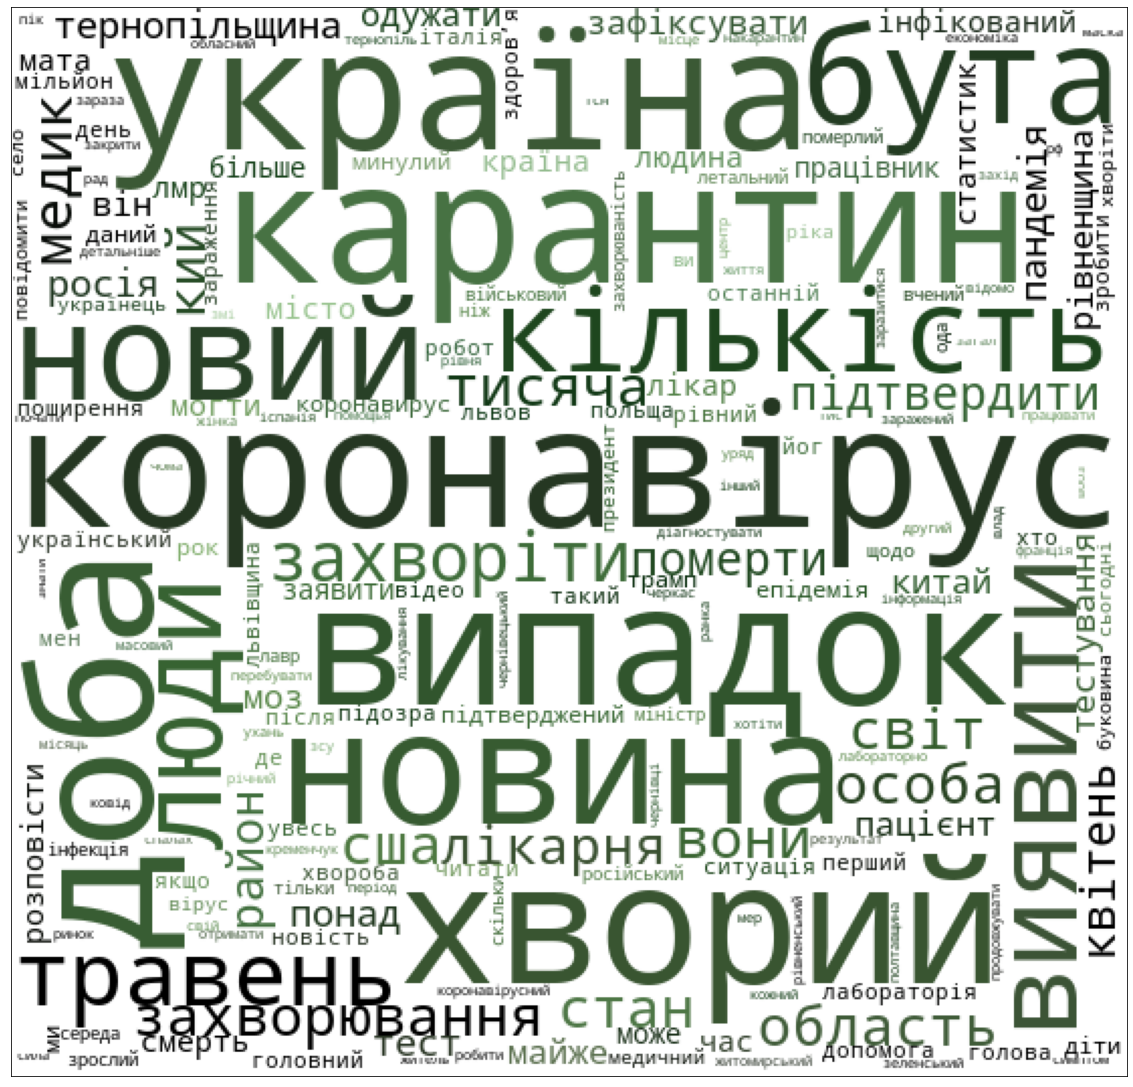

In [0]:
char_mask = np.array(Image.open("v3.png"))    
image_colors = ImageColorGenerator(char_mask)

words = ' '.join([i[1] for i in freq_r[:200]])

wc = WordCloud(background_color="white", max_words=200, width=1000, height=1000, mask=char_mask, random_state=1).generate(words)
plt.figure(figsize=(20,20))
plt.xticks([])
plt.yticks([])
plt.imshow(wc.recolor(color_func=image_colors))

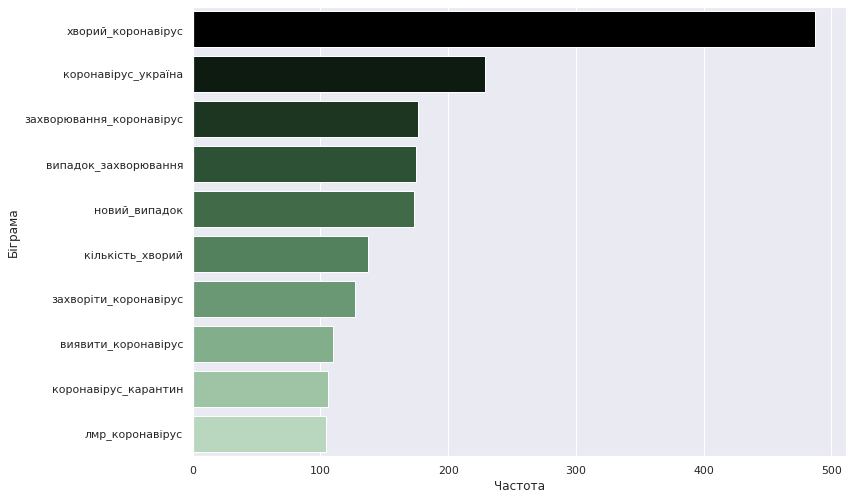

In [272]:
freq_bi = {}
for line in lemmatized_text:
  for bis in list(nltk.bigrams(line)):
    if '_'.join(bis) in freq_bi.keys():
      freq_bi['_'.join(bis)] += 1
    else:
      freq_bi['_'.join(bis)] = 1

freq_bi_sorted = [[k,v] for v,k in freq_bi.items()]
freq_bi_sorted.sort()
freq_bi_sorted.reverse()

freq_bi_0 = [i[0] for i in freq_bi_sorted[:10]]
freq_bi_1 = [i[1] for i in freq_bi_sorted[:10]]
df_bi = pd.DataFrame(data = {'Частота': freq_bi_0, 'Біграма': freq_bi_1})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Біграма',data=df_bi, palette = sns.cubehelix_palette(10, start=2, rot=0, dark=0, light=.8, reverse=True))

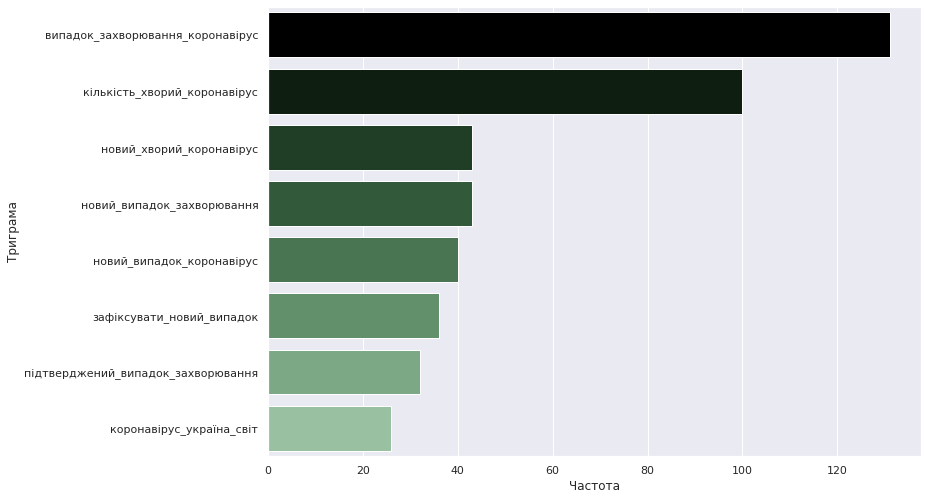

In [276]:
freq_tr = {}
for line in lemmatized_text:
  for tr in list(nltk.trigrams(line)):
    if '_'.join(tr) in freq_tr.keys():
      freq_tr['_'.join(tr)] += 1
    else:
      freq_tr['_'.join(tr)] = 1

freq_tr_sorted = [[k,v] for v,k in freq_tr.items()]
freq_tr_sorted.sort()
freq_tr_sorted.reverse()

freq_tr_0 = [i[0] for i in freq_tr_sorted[:8]]
freq_tr_1 = [i[1] for i in freq_tr_sorted[:8]]
df_tr = pd.DataFrame(data = {'Частота': freq_tr_0, 'Триграма': freq_tr_1})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Триграма',data=df_tr, palette = sns.cubehelix_palette(9, start=2, rot=0, dark=0, light=.8, reverse=True))

# New Section